In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [30]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Define data path
data_dir = Path("Data")
fake_data_1_path = data_dir / "fake_data_1.csv"
fake_data_2_path = data_dir / "fake_data_2.csv"
fake_data_3_path = data_dir / "fake_data_3.csv"
fake_data_4_path = data_dir / "fake_data_4.csv"

real_data_1_path = data_dir / "real_data_1.csv"
real_data_2_path = data_dir / "real_data_2.csv"
real_data_3_path = data_dir / "real_data_3.csv"
real_data_4_path = data_dir / "real_data_4.csv"

columns = ["title", "text", "subject", "date", "real"]

# Read the CSV files
df_train_1 = pd.read_csv(fake_data_1_path, header=None, names=columns)
df_train_2 = pd.read_csv(fake_data_2_path, header=None, names=columns)
df_train_3 = pd.read_csv(fake_data_3_path, header=None, names=columns)
df_train_4 = pd.read_csv(fake_data_4_path, header=None, names=columns)

df_train_5 = pd.read_csv(real_data_1_path, header=None, names=columns)
df_train_6 = pd.read_csv(real_data_2_path, header=None, names=columns)
df_train_7 = pd.read_csv(real_data_3_path, header=None, names=columns)
df_train_8 = pd.read_csv(real_data_4_path, header=None, names=columns)

# Combine datasets into one
df = pd.concat([df_train_1, df_train_2, df_train_3, df_train_4, df_train_4, df_train_5, df_train_6, df_train_7, df_train_8], ignore_index=True)
df = df[df['title'] != "title"]

# Explore data structure
print("Dataset Shape:", df.shape)
df.head(10)

Dataset Shape: (48960, 5)


,title,text,subject,date,real
1,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,12/31/2017,0
2,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,12/31/2017,0
3,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,12/30/2017,0
4,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,12/29/2017,0
5,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,12/25/2017,0
6,KKK Just Threatened An 84-Year-Old Woman Who ...,An elderly Massachussetts woman who wrote a le...,News,3/18/2016,0
7,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,12/25/2017,0
8,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,12/23/2017,0
9,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,12/23/2017,0
10,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,12/22/2017,0


In [31]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
title      0
text       0
subject    0
date       0
real       0
dtype: int64


In [32]:
# Drop rows with missing statements (as statement is critical for NLP analysis)
df.dropna(subset=["text"], inplace=True)

In [33]:
# Fill missing categorical values with 'Unknown'
categorical_columns = ["title", "text", "subject"]
for col in categorical_columns:
    df[col].fillna("Unknown", inplace=True)

/var/folders/sy/0blmjqvn66q9pd453v1y2zdh0000gn/T/ipykernel_42429/297880609.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [34]:
# Convert labels to a simplified binary classification
#label_map = {
   # 1: 1, 0: 0
#}
#df["binary_label"] = df["real"].map(label_map)

In [35]:
# Drop unnecessary columns (id is not useful for ML)
#df.drop(columns=["title"], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Summary of the cleaned dataset
print("\nCleaned Dataset Shape:", df.shape)
df.head()


Cleaned Dataset Shape: (44657, 5)


,title,text,subject,date,real
1,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,12/31/2017,0
2,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,12/31/2017,0
3,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,12/30/2017,0
4,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,12/29/2017,0
5,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,12/25/2017,0


In [36]:
# Save cleaned dataset
df.to_csv("data_cleaned.csv", index=False)
print("\nCleaned data saved as data_cleaned.csv")


Cleaned data saved as data_cleaned.csv


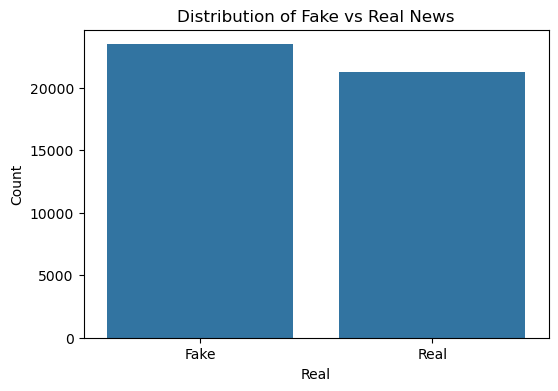

In [37]:
# Quick visualization of label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['real'])
plt.title("Distribution of Fake vs Real News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.xlabel("Real")
plt.ylabel("Count")
plt.show()